In [39]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense




In [40]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [41]:
xtrain.shape

(60000, 28, 28)

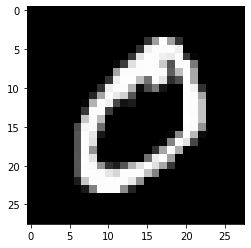

In [42]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [43]:
ytrain[1]

0

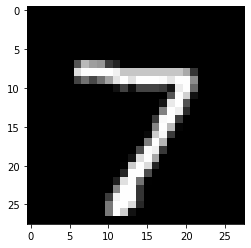

In [44]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [45]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [46]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [47]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [48]:
x_test.shape

(10000, 784)

In [49]:
x_train/=255
x_test/=255

In [50]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [51]:
# Initialize the constructor

model = Sequential()

In [52]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0110 - accuracy: 0.9966
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0094 - accuracy: 0.9968
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0130 - accuracy: 0.9958
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0035 - accuracy: 0.9991
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0016 - accuracy: 0.9997
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0035 - accuracy: 0.9991s - loss: 0.0034 - accuracy
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0091 - accuracy: 0.9968s - loss: 0
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0099 - accuracy: 0.9967
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.

In [78]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.980
Loss: 0.097


In [79]:
y_predict = model.predict(x_test)

In [80]:
y_predict[0]

array([7.8352060e-13, 6.4746727e-13, 1.1358263e-13, 4.6491561e-08,
       4.9587479e-17, 1.5267884e-11, 4.6178929e-21, 1.0000000e+00,
       1.5426031e-12, 1.5341629e-10], dtype=float32)

In [81]:
np.argmax(y_predict[0])

7

In [82]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 973    1    0    1    1    2    0    1    0    1]
 [   1 1122    5    1    0    1    0    1    4    0]
 [   4    0 1012    2    1    0    0    7    6    0]
 [   0    0    7  990    0    4    0    2    4    3]
 [   2    0    6    0  946    1    1    6    1   19]
 [   1    1    0    9    0  872    0    0    5    4]
 [   3    2    3    0    5   12  928    0    5    0]
 [   0    1    4    3    0    0    0 1012    3    5]
 [   0    0    3    8    1    1    0    2  957    2]
 [   0    1    0    8    4    4    0    2    4  986]]


In [83]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.97      0.98      0.97       892
           6       1.00      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

